In [25]:
# 1 Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
path = r"C:\Users\Nur Aini Mahfud\Downloads\Online Retail Data.xlsx"
print(os.path.exists(path))

True


In [3]:
path = r"C:\Users\Nur Aini Mahfud\Downloads\Online Retail Data.xlsx"
df = pd.read_excel(path, engine="openpyxl")
print(df.head())

  order_id product_code                     product_name  quantity  \
0   493410      TEST001          This is a test product.         5   
1  C493411        21539          RETRO SPOTS BUTTER DISH        -1   
2   493412      TEST001          This is a test product.         5   
3   493413        21724  PANDA AND BUNNIES STICKER SHEET         1   
4   493413        84578   ELEPHANT TOY WITH BLUE T-SHIRT         1   

           order_date  price  customer_id  
0 2010-01-04 09:24:00   4.50      12346.0  
1 2010-01-04 09:43:00   4.25      14590.0  
2 2010-01-04 09:53:00   4.50      12346.0  
3 2010-01-04 09:54:00   0.85          NaN  
4 2010-01-04 09:54:00   3.75          NaN  


In [64]:
# 2 Cleaning Data

In [5]:
empty_products = df[df['product_name'].isna()]
print("Jumlah product name kosong:", empty_products.shape[0])
empty_products.head()

Jumlah product name kosong: 2718


,order_id,product_code,product_name,quantity,order_date,price,customer_id
481,493494,21231,NaN,-84,2010-01-04 14:56:00,0.0,NaN
482,493508,20887,NaN,9,2010-01-04 15:08:00,0.0,NaN
483,493510,40046C,NaN,7,2010-01-04 15:08:00,0.0,NaN
484,493509,21558,NaN,7,2010-01-04 15:08:00,0.0,NaN
485,493513,47009,NaN,3,2010-01-04 15:09:00,0.0,NaN


In [6]:
df['product_name'] = df['product_name'].fillna("Unknown Product")
print("Jumlah 'Unknown Product':", (df['product_name'] == "Unknown Product").sum())
print(df[df['product_name'] == "Unknown Product"].head())

Jumlah 'Unknown Product': 2718
    order_id product_code     product_name  quantity          order_date  \
481   493494        21231  Unknown Product       -84 2010-01-04 14:56:00   
482   493508        20887  Unknown Product         9 2010-01-04 15:08:00   
483   493510       40046C  Unknown Product         7 2010-01-04 15:08:00   
484   493509        21558  Unknown Product         7 2010-01-04 15:08:00   
485   493513        47009  Unknown Product         3 2010-01-04 15:09:00   

     price  customer_id  
481    0.0          NaN  
482    0.0          NaN  
483    0.0          NaN  
484    0.0          NaN  
485    0.0          NaN  


In [7]:
print("Jumlah nilai kosong per kolom:")
print(df.isnull().sum())

Jumlah nilai kosong per kolom:
order_id             0
product_code         0
product_name         0
quantity             0
order_date           0
price                0
customer_id     100920
dtype: int64


In [8]:
df['customer_id'] = df['customer_id'].fillna("Unknown Customer")
print("Jumlah Customer ID kosong (NaN):", df['customer_id'].isnull().sum())
print("Jumlah Customer ID = 'Unknown Customer':", (df['customer_id'] == "Unknown Customer").sum())
print(df[df['customer_id'] == "Unknown Customer"].head())

Jumlah Customer ID kosong (NaN): 0
Jumlah Customer ID = 'Unknown Customer': 100920
    order_id product_code                         product_name  quantity  \
3     493413        21724      PANDA AND BUNNIES STICKER SHEET         1   
4     493413        84578       ELEPHANT TOY WITH BLUE T-SHIRT         1   
5     493413        21723        ALPHABET HEARTS STICKER SHEET         1   
477   493485        72008  FROSTED BOX 9 WHITE T-LIGHT CANDLES        24   
478   493485        21589           SWALLOW GIANT TUBE MATCHES         2   

             order_date  price       customer_id  
3   2010-01-04 09:54:00   0.85  Unknown Customer  
4   2010-01-04 09:54:00   3.75  Unknown Customer  
5   2010-01-04 09:54:00   0.85  Unknown Customer  
477 2010-01-04 14:48:00   0.42  Unknown Customer  
478 2010-01-04 14:48:00   2.55  Unknown Customer  


In [9]:
print("Jumlah nilai kosong per kolom:")
print(df.isnull().sum())

Jumlah nilai kosong per kolom:
order_id        0
product_code    0
product_name    0
quantity        0
order_date      0
price           0
customer_id     0
dtype: int64


In [10]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [11]:
print(df.head())

  order_id product_code                     product_name  quantity  \
0   493410      TEST001          This is a test product.         5   
1  C493411        21539          RETRO SPOTS BUTTER DISH        -1   
2   493412      TEST001          This is a test product.         5   
3   493413        21724  PANDA AND BUNNIES STICKER SHEET         1   
4   493413        84578   ELEPHANT TOY WITH BLUE T-SHIRT         1   

           order_date  price       customer_id  
0 2010-01-04 09:24:00   4.50           12346.0  
1 2010-01-04 09:43:00   4.25           14590.0  
2 2010-01-04 09:53:00   4.50           12346.0  
3 2010-01-04 09:54:00   0.85  Unknown Customer  
4 2010-01-04 09:54:00   3.75  Unknown Customer  


In [12]:
print(df.dtypes)

order_id                object
product_code            object
product_name            object
quantity                 int64
order_date      datetime64[ns]
price                  float64
customer_id             object
dtype: object


In [13]:
print("Jumlah Duplikat:", df.duplicated().sum())

Jumlah Duplikat: 6479


In [14]:
duplicates = df[df.duplicated(keep=False)]

print("Jumlah baris duplikat:", duplicates.shape[0])
duplicates.head()

Jumlah baris duplikat: 12527


,order_id,product_code,product_name,quantity,order_date,price,customer_id
160,493435,21678,PAISLEY PATTERN STICKERS,2,2010-01-04 12:57:00,0.85,13206.0
173,493435,21678,PAISLEY PATTERN STICKERS,2,2010-01-04 12:57:00,0.85,13206.0
254,493442,20751,FUNKY WASHING UP GLOVES ASSORTED,1,2010-01-04 13:36:00,2.10,13821.0
255,493442,20751,FUNKY WASHING UP GLOVES ASSORTED,1,2010-01-04 13:36:00,2.10,13821.0
264,493442,20712,JUMBO BAG WOODLAND ANIMALS,1,2010-01-04 13:36:00,1.95,13821.0


In [15]:
df = df.drop_duplicates(keep='first')

print("Jumlah baris setelah hapus duplikat:", len(df))

Jumlah baris setelah hapus duplikat: 455294


In [16]:
print("Jumlah Duplikat:", df.duplicated().sum())

Jumlah Duplikat: 0


In [17]:
df = df[(df['quantity']>0) & (df['price']>0)]

In [18]:
df['revenue'] = df['quantity'] * df['price']
print(df.head()) 

  order_id product_code                     product_name  quantity  \
0   493410      TEST001          This is a test product.         5   
2   493412      TEST001          This is a test product.         5   
3   493413        21724  PANDA AND BUNNIES STICKER SHEET         1   
4   493413        84578   ELEPHANT TOY WITH BLUE T-SHIRT         1   
5   493413        21723    ALPHABET HEARTS STICKER SHEET         1   

           order_date  price       customer_id  revenue  
0 2010-01-04 09:24:00   4.50           12346.0    22.50  
2 2010-01-04 09:53:00   4.50           12346.0    22.50  
3 2010-01-04 09:54:00   0.85  Unknown Customer     0.85  
4 2010-01-04 09:54:00   3.75  Unknown Customer     3.75  
5 2010-01-04 09:54:00   0.85  Unknown Customer     0.85  


In [19]:
df.describe()

,quantity,order_date,price,revenue
count,443560.000000,443560,443560.000000,443560.000000
mean,10.071826,2010-07-23 16:31:09.984083200,4.232654,18.954618
min,1.000000,2010-01-04 09:24:00,0.001000,0.001000
25%,1.000000,2010-04-22 14:33:00,1.250000,3.750000
50%,3.000000,2010-08-05 10:44:00,2.100000,9.900000
75%,10.000000,2010-10-31 10:49:00,4.210000,17.400000
max,10000.000000,2010-12-23 17:41:00,25111.090000,25111.090000
std,60.090739,NaN,65.619622,92.055898


In [20]:
print("Dataset Final:", df.shape)
df.head()

Dataset Final: (443560, 8)


,order_id,product_code,product_name,quantity,order_date,price,customer_id,revenue
0,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0,22.50
2,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0,22.50
3,493413,21724,PANDA AND BUNNIES STICKER SHEET,1,2010-01-04 09:54:00,0.85,Unknown Customer,0.85
4,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1,2010-01-04 09:54:00,3.75,Unknown Customer,3.75
5,493413,21723,ALPHABET HEARTS STICKER SHEET,1,2010-01-04 09:54:00,0.85,Unknown Customer,0.85


In [21]:
df.tail()

,order_id,product_code,product_name,quantity,order_date,price,customer_id,revenue
461768,539991,21618,4 WILDFLOWER BOTANICAL CANDLES,1,2010-12-23 16:49:00,1.25,Unknown Customer,1.25
461769,539991,72741,GRAND CHOCOLATECANDLE,4,2010-12-23 16:49:00,1.45,Unknown Customer,5.80
461770,539992,21470,FLOWER VINE RAFFIA FOOD COVER,1,2010-12-23 17:41:00,3.75,Unknown Customer,3.75
461771,539992,22258,FELT FARM ANIMAL RABBIT,1,2010-12-23 17:41:00,1.25,Unknown Customer,1.25
461772,539992,21155,RED RETROSPOT PEG BAG,1,2010-12-23 17:41:00,2.10,Unknown Customer,2.10


In [27]:
# 3 EDA

In [28]:
# --- Statistik Deskriptif ---

In [29]:
print("\nStatistik Deskriptif:")
print(df.describe(include='all'))


Statistik Deskriptif:
        order_id product_code                        product_name  \
count   443560.0       443560                              443560   
unique   18369.0         4101                                4351   
top     537434.0       85123A  WHITE HANGING HEART T-LIGHT HOLDER   
freq       675.0         3068                                3105   
mean         NaN          NaN                                 NaN   
min          NaN          NaN                                 NaN   
25%          NaN          NaN                                 NaN   
50%          NaN          NaN                                 NaN   
75%          NaN          NaN                                 NaN   
max          NaN          NaN                                 NaN   
std          NaN          NaN                                 NaN   

             quantity                     order_date          price  \
count   443560.000000                         443560  443560.000000   
unique

In [30]:
df.describe().style.set_caption("Statistik Deskriptif Dataset")

,quantity,order_date,price,revenue
count,443560.000000,443560,443560.000000,443560.000000
mean,10.071826,2010-07-23 16:31:09.984083200,4.232654,18.954618
min,1.000000,2010-01-04 09:24:00,0.001000,0.001000
25%,1.000000,2010-04-22 14:33:00,1.250000,3.750000
50%,3.000000,2010-08-05 10:44:00,2.100000,9.900000
75%,10.000000,2010-10-31 10:49:00,4.210000,17.400000
max,10000.000000,2010-12-23 17:41:00,25111.090000,25111.090000
std,60.090739,nan,65.619622,92.055898


In [32]:
# --- Distribusi quantity ---

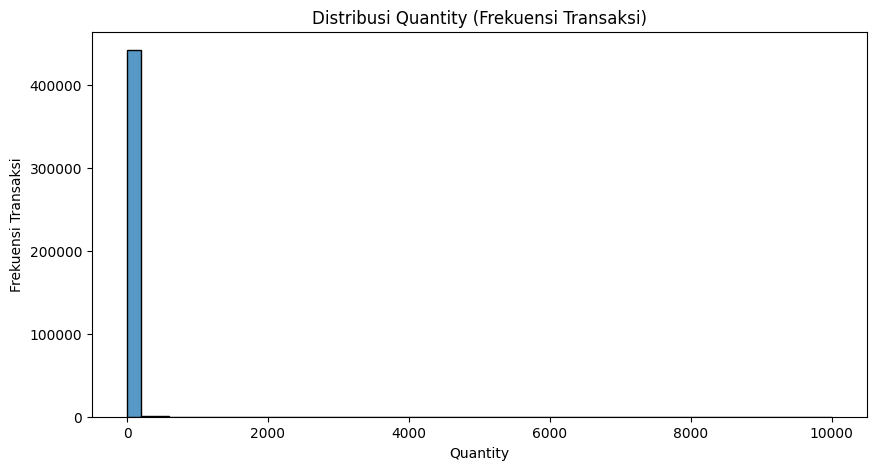

In [42]:
plt.figure(figsize=(10,5))
sns.histplot(df['quantity'], bins=50, kde=False, stat="count")
plt.title("Distribusi Quantity (Frekuensi Transaksi)")
plt.xlabel("Quantity")
plt.ylabel("Frekuensi Transaksi")
plt.show()

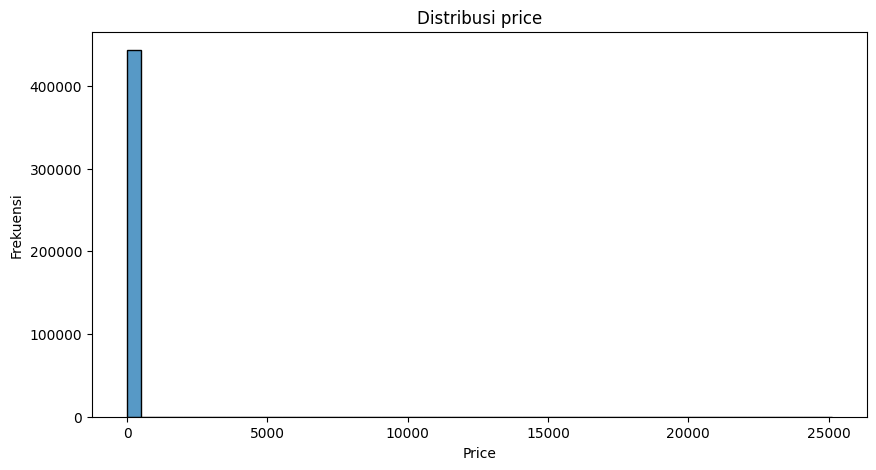

In [40]:
plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=50, kde=False, stat="count")
plt.title("Distribusi price")
plt.xlabel("Price")
plt.ylabel("Frekuensi")
plt.show()

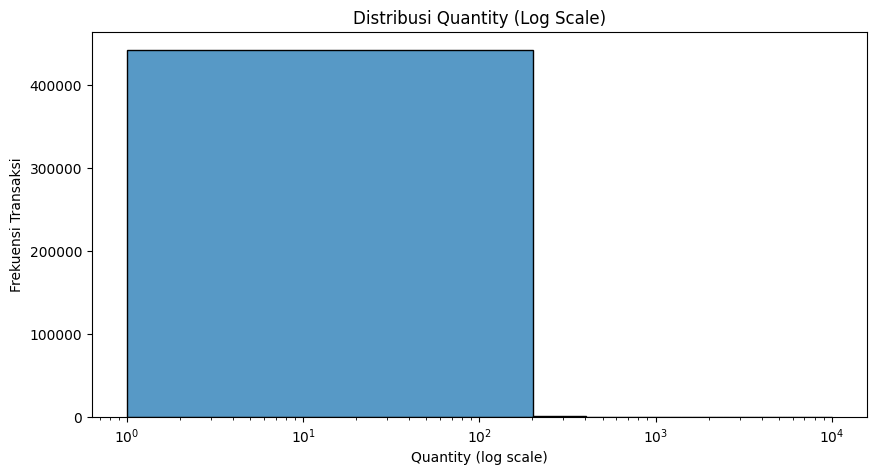

In [43]:
plt.figure(figsize=(10,5))
sns.histplot(df['quantity'], bins=50, kde=False, stat="count")
plt.xscale('log')
plt.title("Distribusi Quantity (Log Scale)")
plt.xlabel("Quantity (log scale)")
plt.ylabel("Frekuensi Transaksi")
plt.show()

In [52]:
# --- TOP 10 BEST SELLING PRODUCT ---

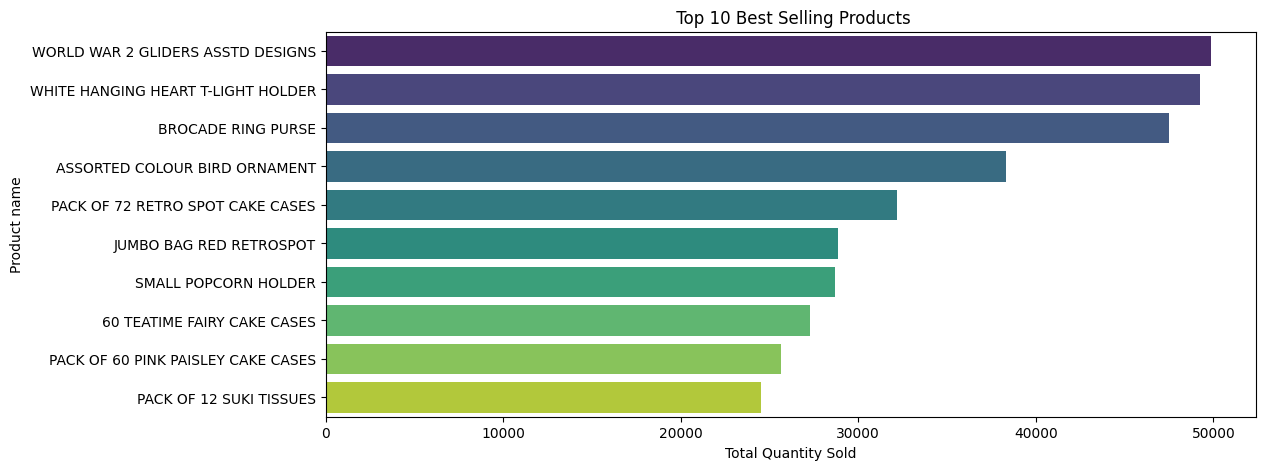

In [46]:
top_products = df.groupby('product_name')['quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,5))
sns.barplot(
    x=top_products.values, 
    y=top_products.index,
    hue=top_products.index,
    palette="viridis",
    legend=False
)
plt.title(" Top 10 Best Selling Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product name")
plt.show()

In [55]:
# --- TOP 10 CUSTOMER BY QUANTITY ---

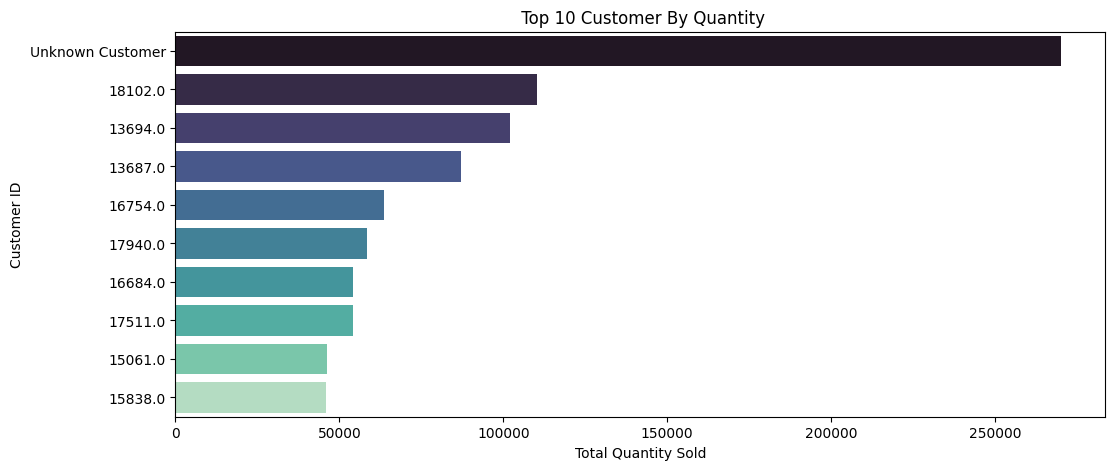

In [53]:
top_customers = df.groupby('customer_id')['quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,5))
sns.barplot(
    x=top_customers.values, 
    y=top_customers.index,
    hue=top_customers.index,
    palette="mako",
    legend=False
)
plt.title(" Top 10 Customer By Quantity")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Customer ID")
plt.show()

In [56]:
# --- TOTAL COUNT ORDER PER MONTH ---

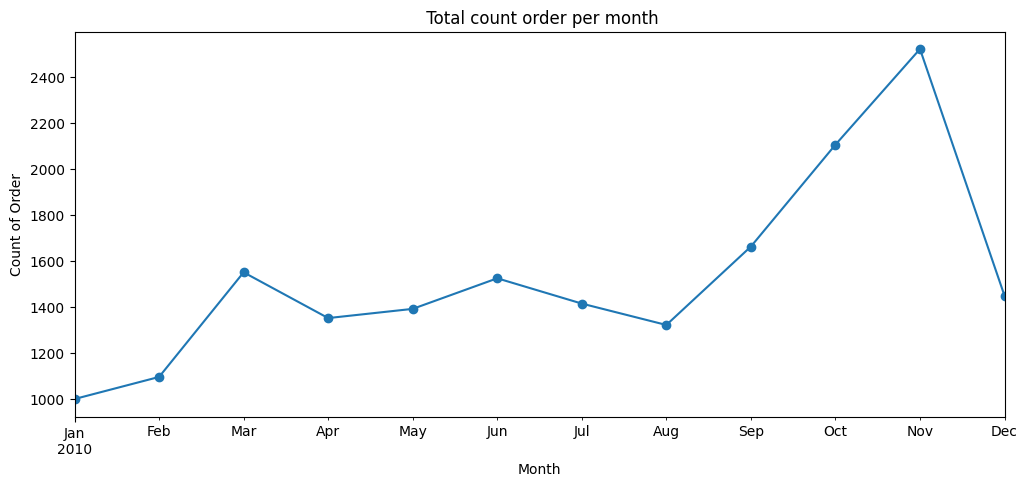

In [57]:
orders_by_month = df.groupby(df['order_date'].dt.to_period("M"))['order_id'].nunique()

plt.figure(figsize=(12,5))
orders_by_month.plot(kind='line', marker='o')
plt.title(" Total count order per month")
plt.xlabel("Month")
plt.ylabel("Count of Order")
plt.show()